In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
"""
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부
"""

In [ ]:
"""
EDA 분석
"""

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#개별 피처 탐색

In [6]:
df['Legendary'].value_counts()
"""
일반 포켓몬 : 735
레전드 포켓몬 : 65 
"""

False    735
True      65
Name: Legendary, dtype: int64

<AxesSubplot:>

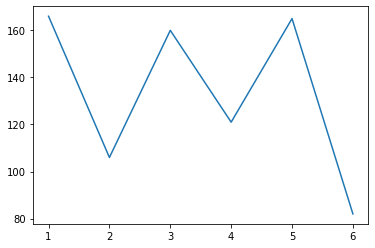

In [9]:
df['Generation'].value_counts().sort_index().plot()
#홀수 세대가 데이터가 많은것을 확인

In [10]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [11]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

In [ ]:
"""
 - 데이터의 특징 탐색
"""

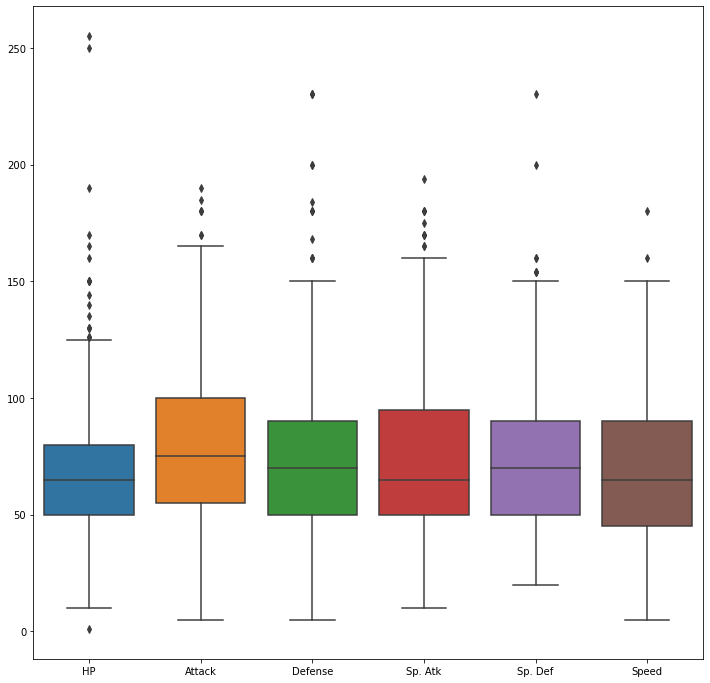

In [16]:
#변수들의 분포 탐색

fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

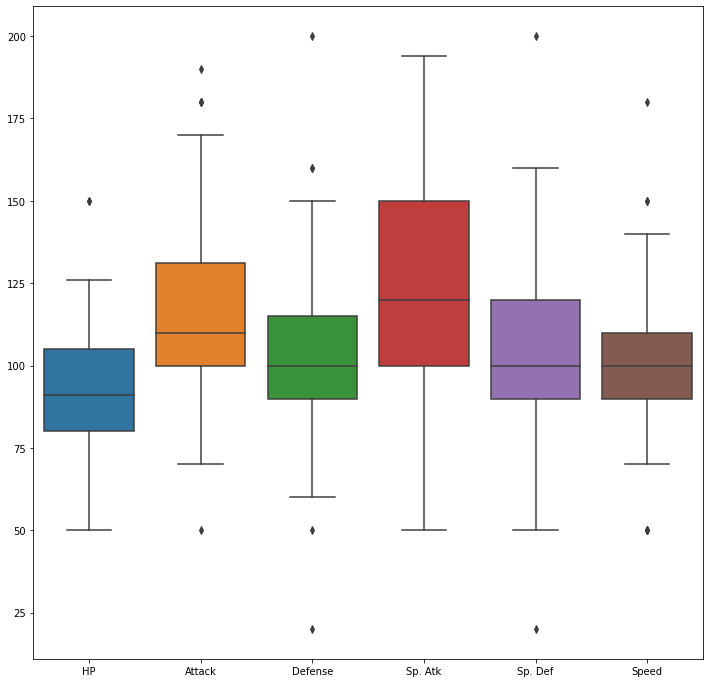

In [19]:
#레전드 피쳐 그룹별 탐색
#변수들의 분포 탐색

fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data=df[df["Legendary"]==1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

<AxesSubplot:>

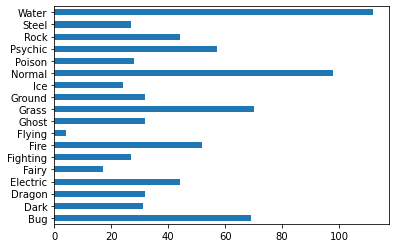

In [20]:
#일반(타입1)
df['Type 1'].value_counts(sort=False).sort_index().plot.barh()

<AxesSubplot:>

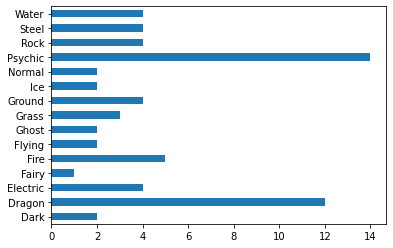

In [22]:
#레전드(타입1)
df[df['Legendary']==1]['Type 1'].value_counts(sort=False).sort_index().plot.barh()

<AxesSubplot:>

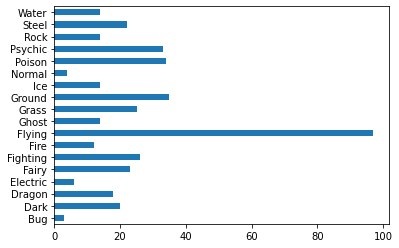

In [23]:
#일반(타입2)
df['Type 2'].value_counts(sort=False).sort_index().plot.barh()

<AxesSubplot:>

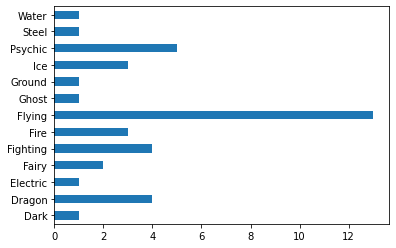

In [24]:
#레전드(타입2)
df[df['Legendary']==1]['Type 2'].value_counts(sort=False).sort_index().plot.barh()

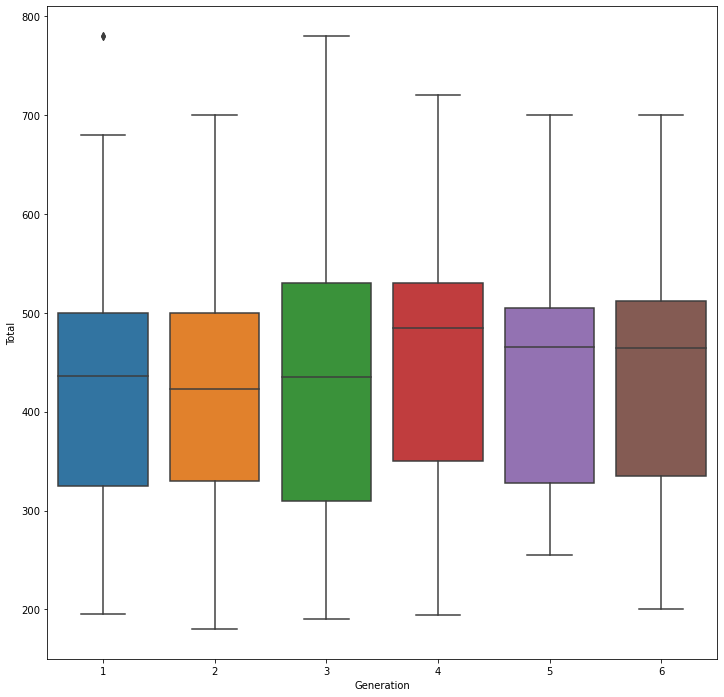

In [25]:
#포켓몬 능력 분포 확인

#세대별로 능력 분포
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "Generation", y = "Total", data=df, ax=ax)
plt.show()

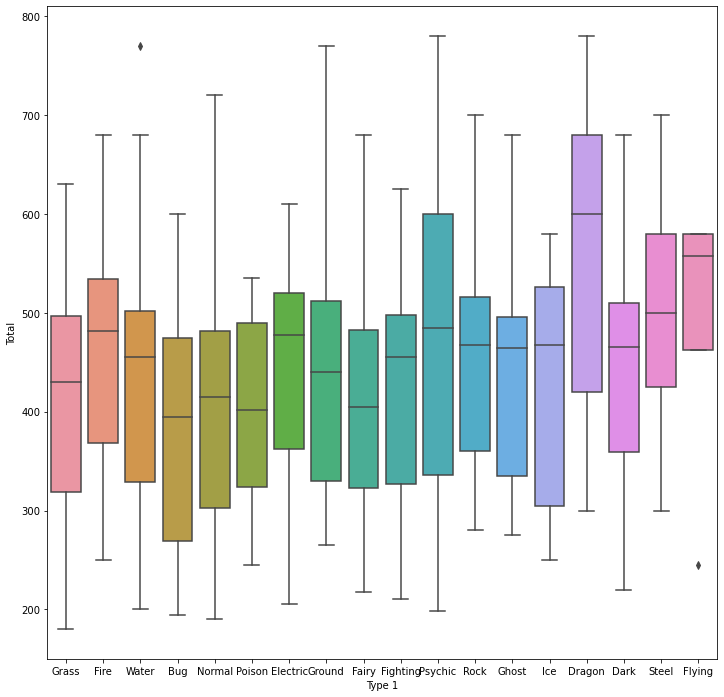

In [26]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "Type 1", y = "Total", data=df, ax=ax)
plt.show()